In [3]:
# import necessary libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
# load dataset 
csv_path = "train.csv"
df_train = pd.read_csv(csv_path, sep = ',')  

csv_path = "test.csv"
df_test = pd.read_csv(csv_path, sep = ',')  

In [7]:
# check shape
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [9]:
# look a first 10 rows of training data
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
# look a first 10 rows of training data
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [13]:
# see all the column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [19]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
print(df_train.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [23]:
# Drop non-numeric columns
df_numeric = df_train.select_dtypes(include=[np.number])

# Alternatively, if you want to convert categorical data to numeric, you can use encoding methods
# For example, using label encoding:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_train.select_dtypes(include=[object]):
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le
    
# After conversion, you can recalculate the correlation matrix
df_numeric = df_train.select_dtypes(include=[np.number])


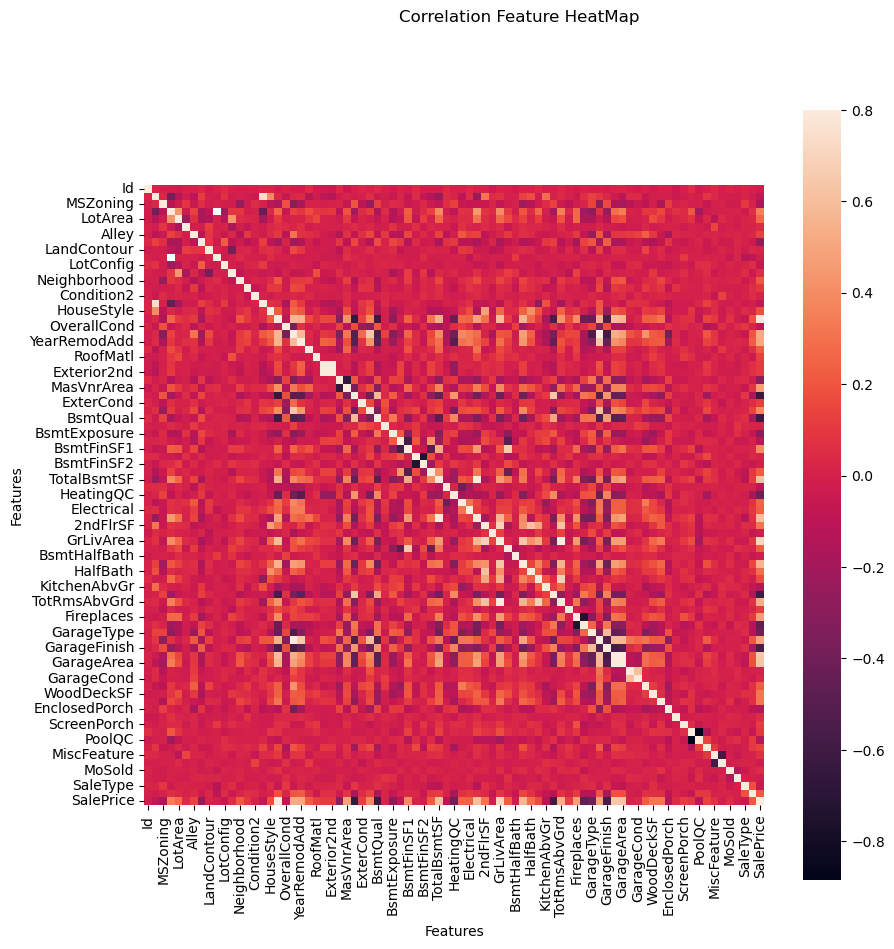

In [25]:
corr_mat = df_numeric.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_mat, vmax=.8, square=True)
plt.suptitle("Correlation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


Text(99.74999999999999, 0.5, 'Features')

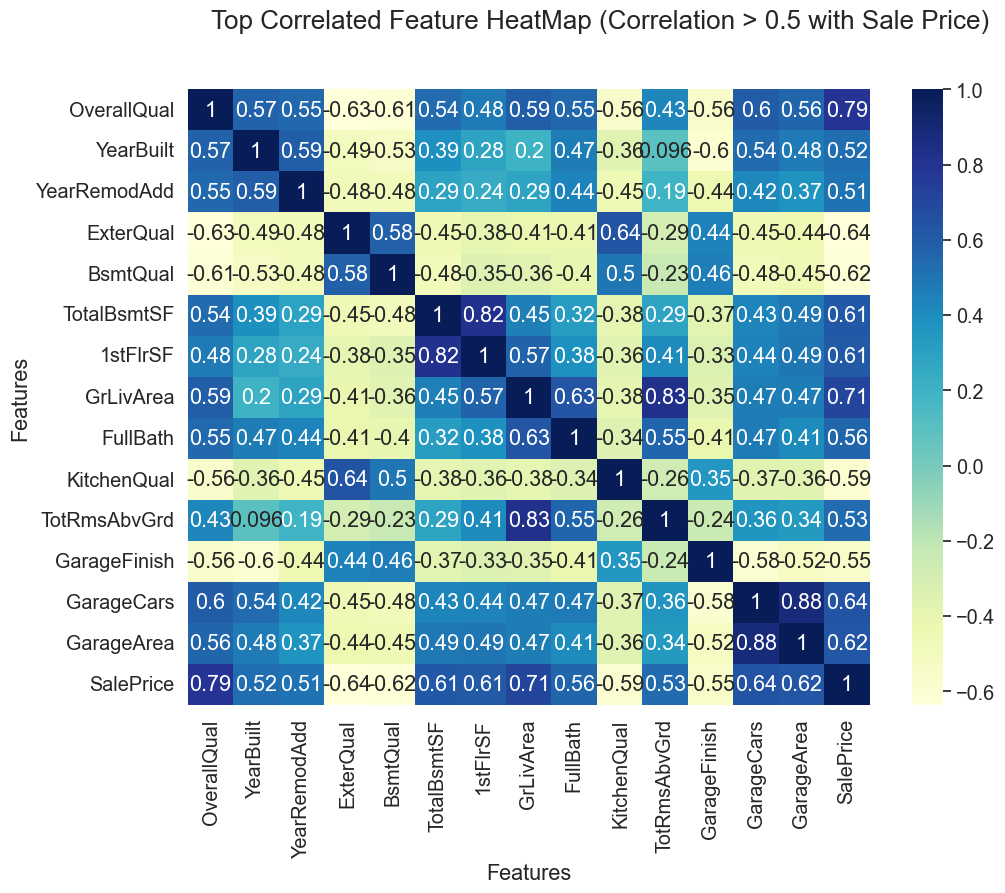

In [27]:
# most correlated features
corr_mat = df_numeric.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [29]:
print("Correlation Values")

corr = df_numeric.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
                  ...   
FireplaceQu    -0.459605
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
Name: SalePrice, Length: 80, dtype: float64


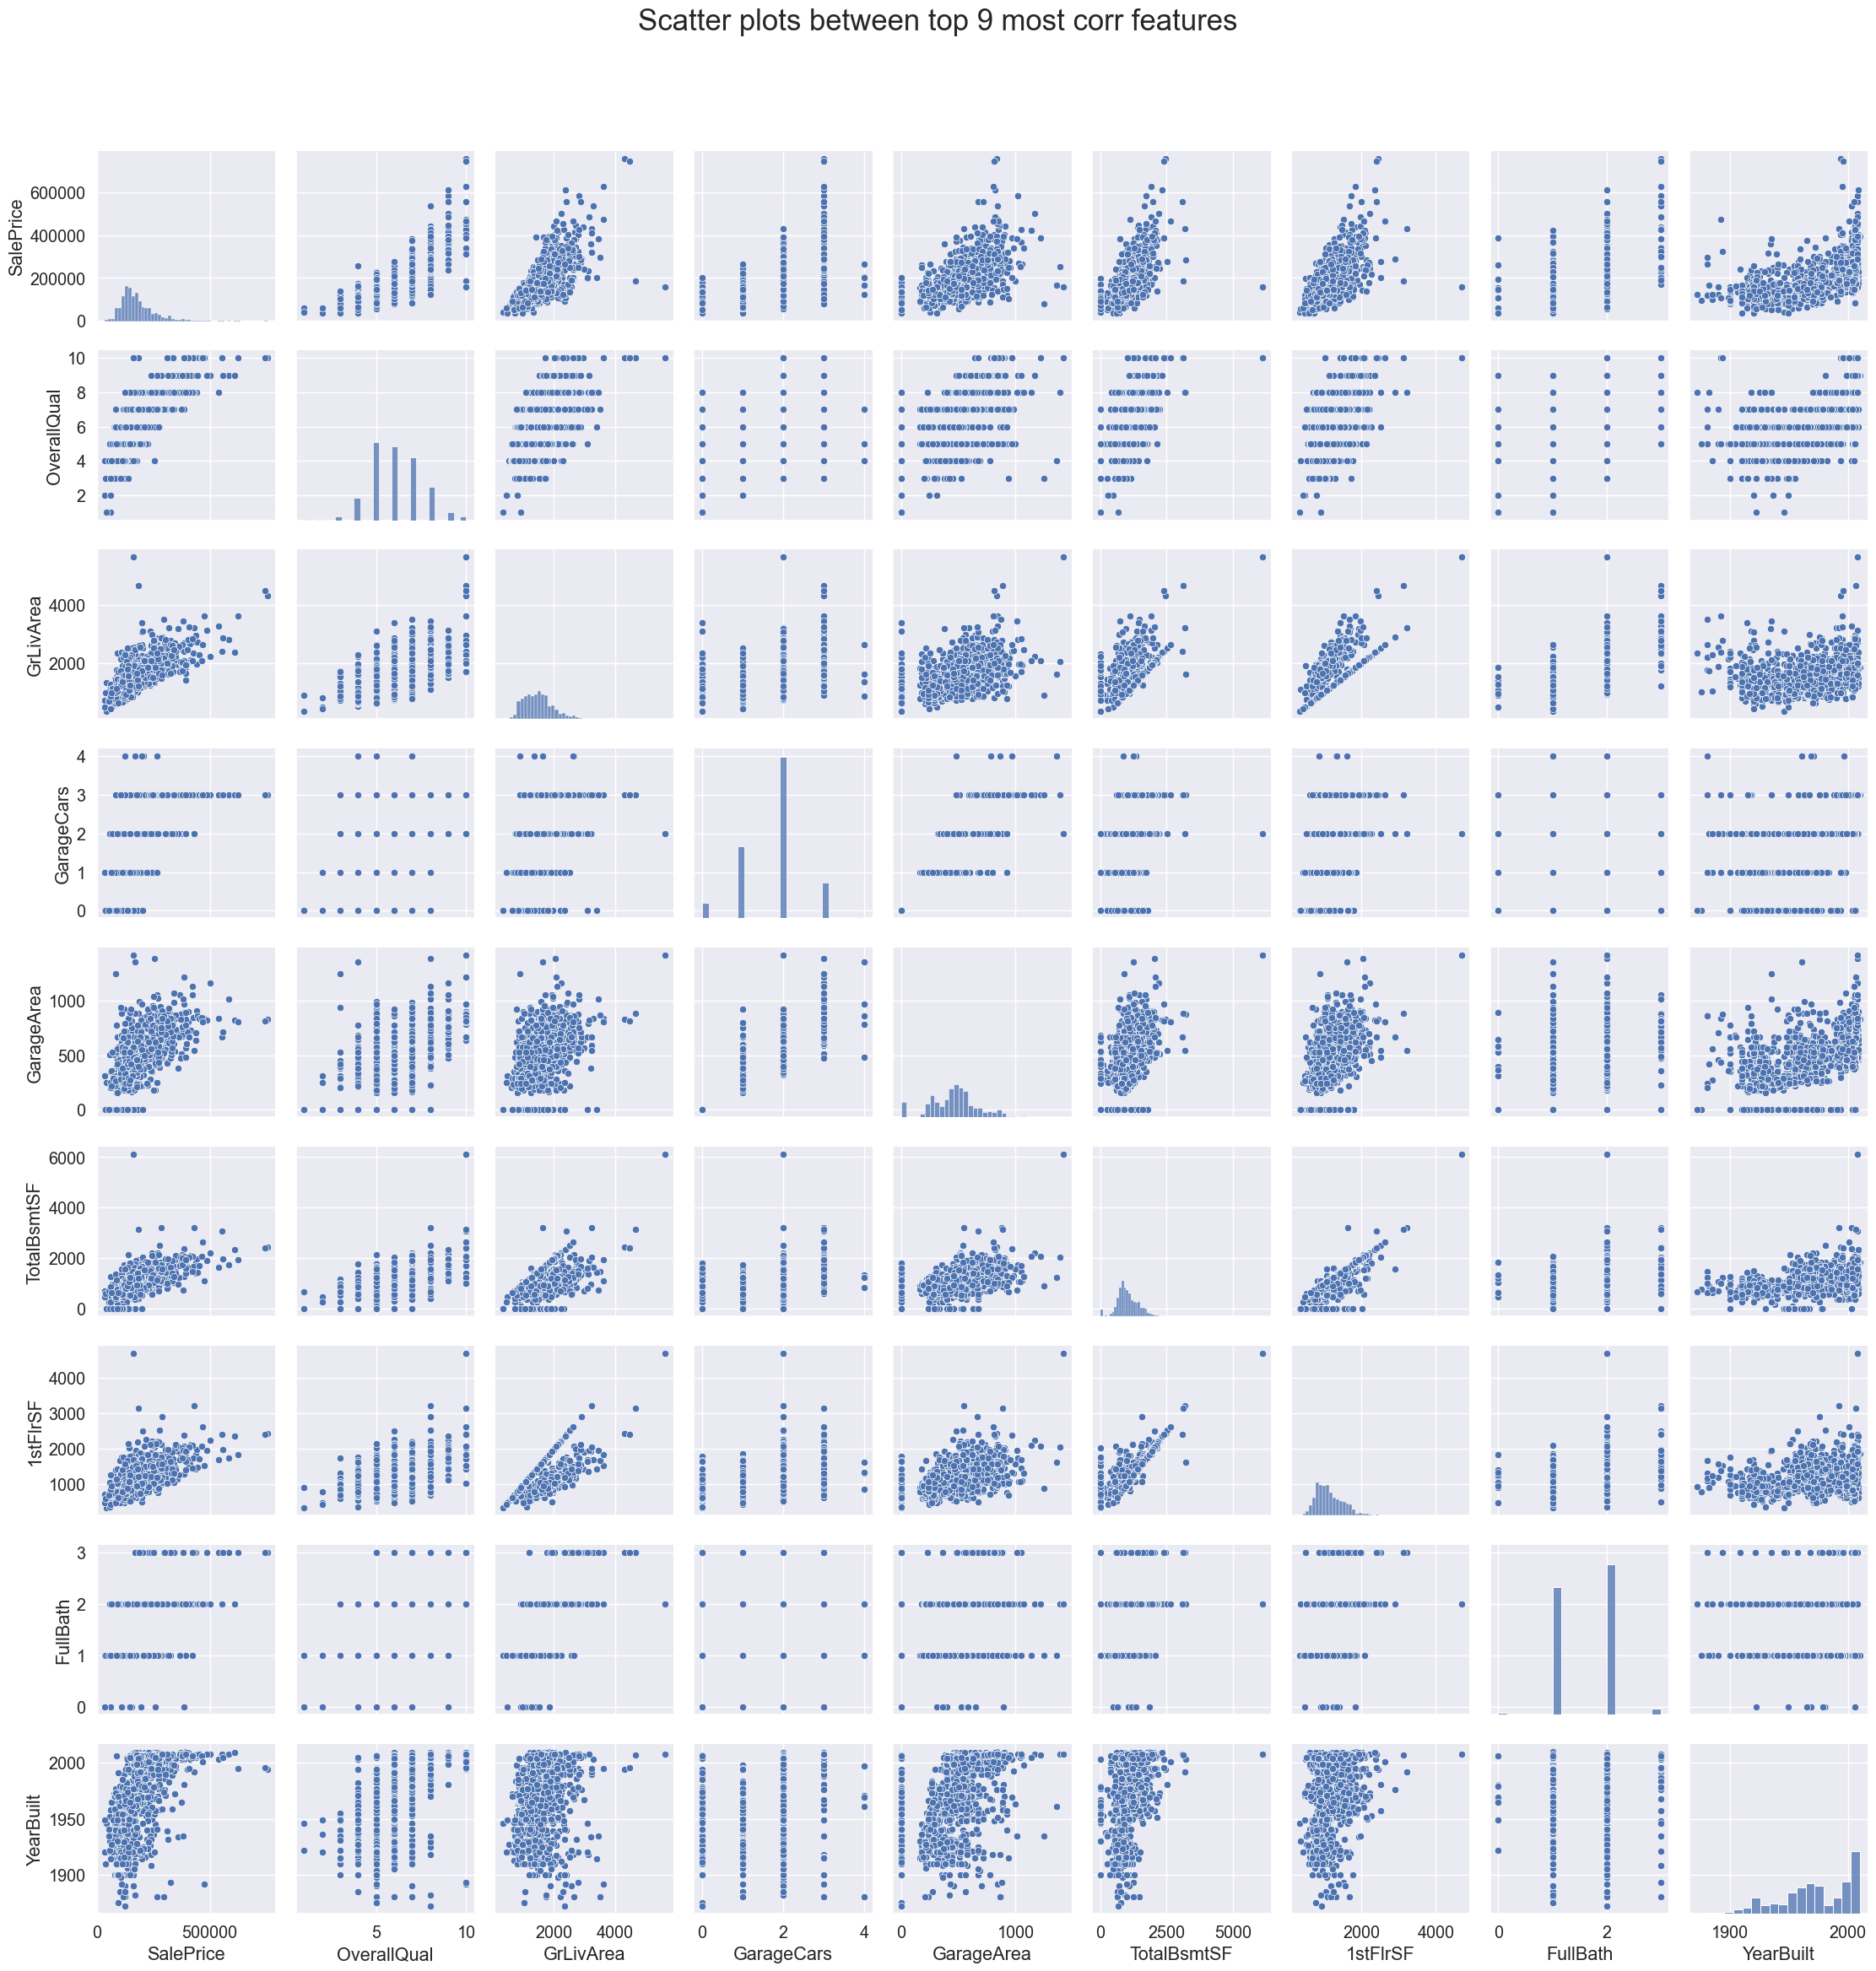

In [31]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(df_numeric[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

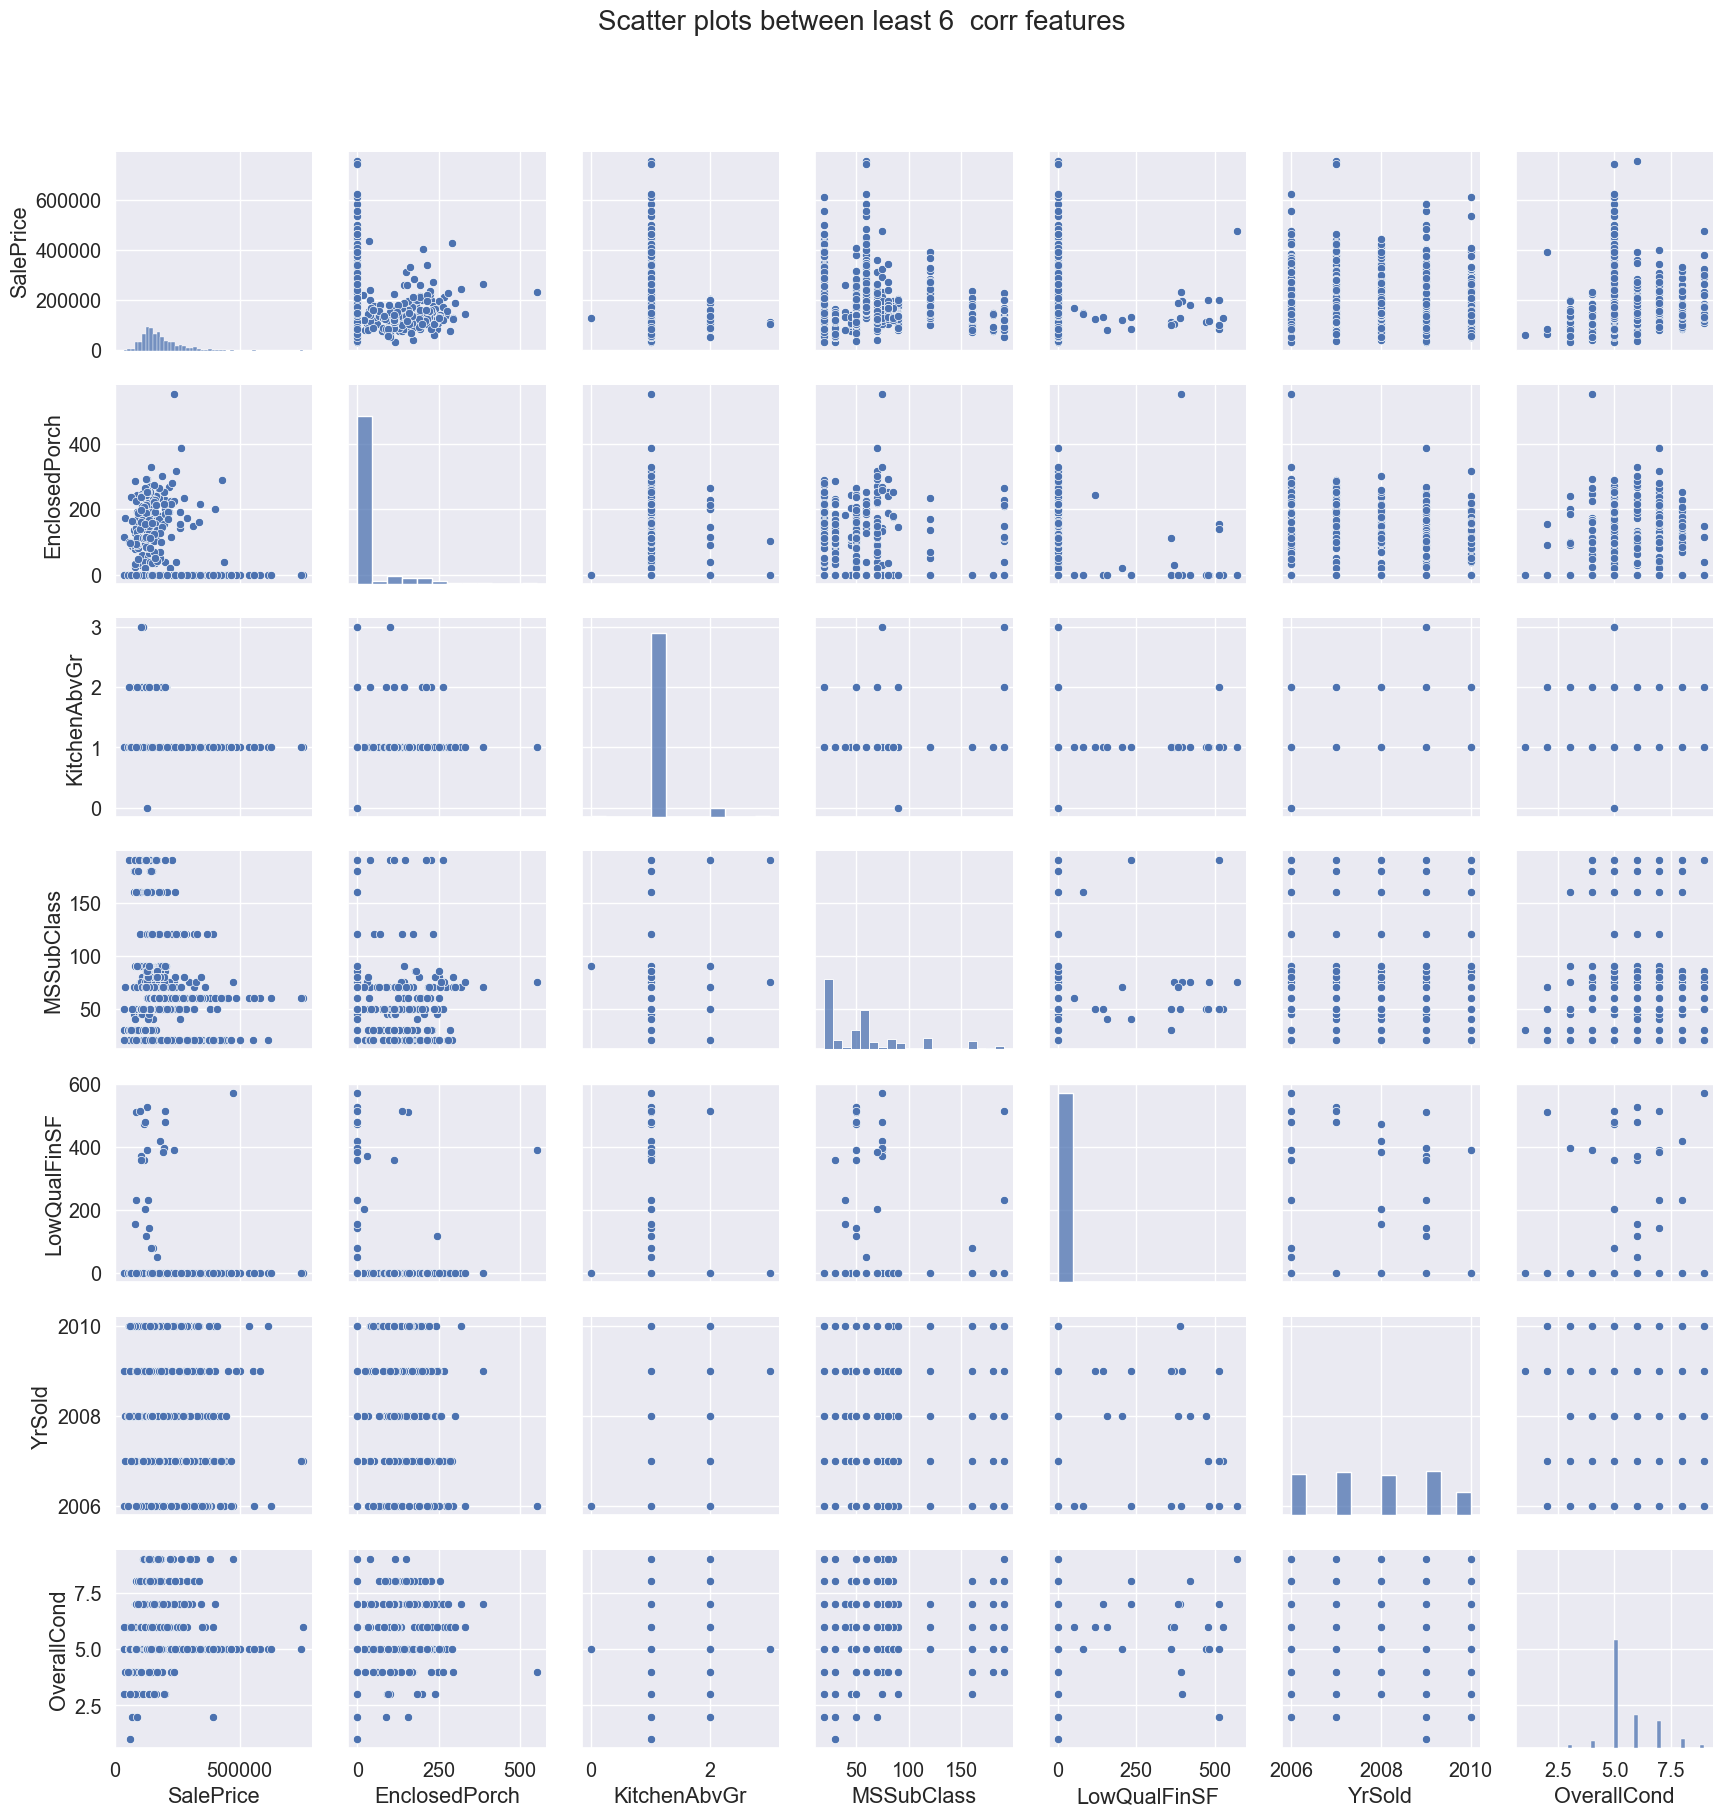

In [33]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
sns_plot = sns.pairplot(df_numeric[cols])

plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

In [35]:
#drop id as it is not required for training or prediction
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

In [37]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

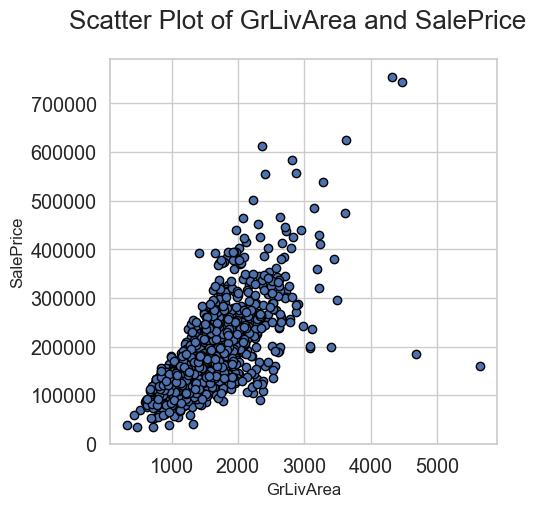

In [39]:
scatter_plot('GrLivArea')

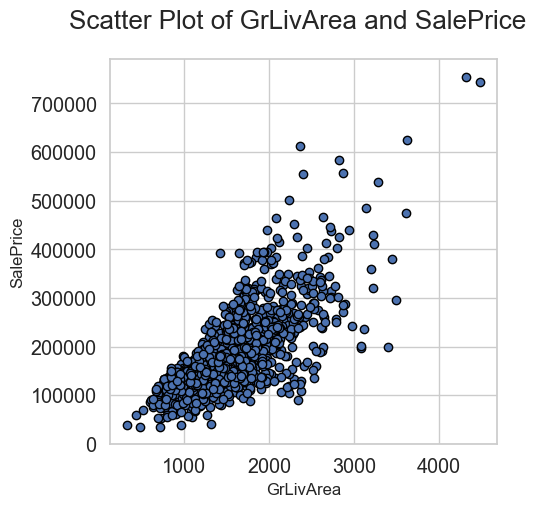

In [41]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['GrLivArea'] > 4000) & ( df_train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

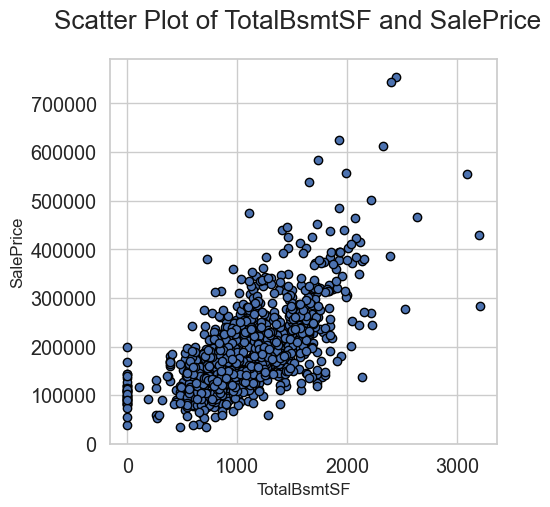

In [43]:
scatter_plot('TotalBsmtSF')

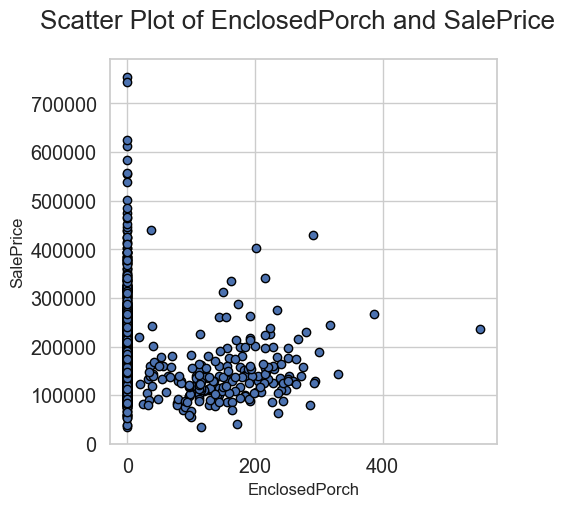

In [45]:
scatter_plot('EnclosedPorch')

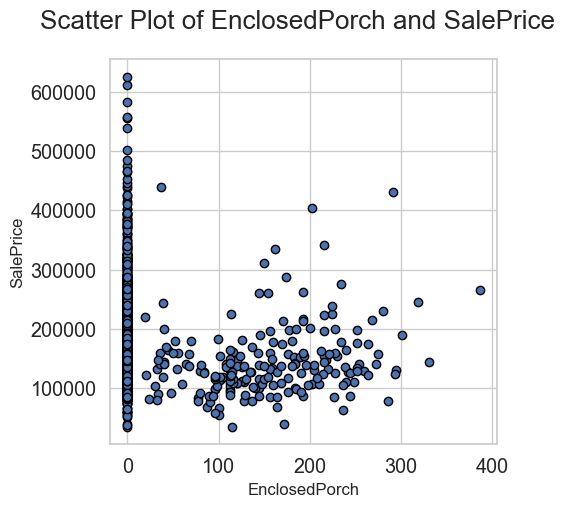

In [47]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['EnclosedPorch']>400)].index)

#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

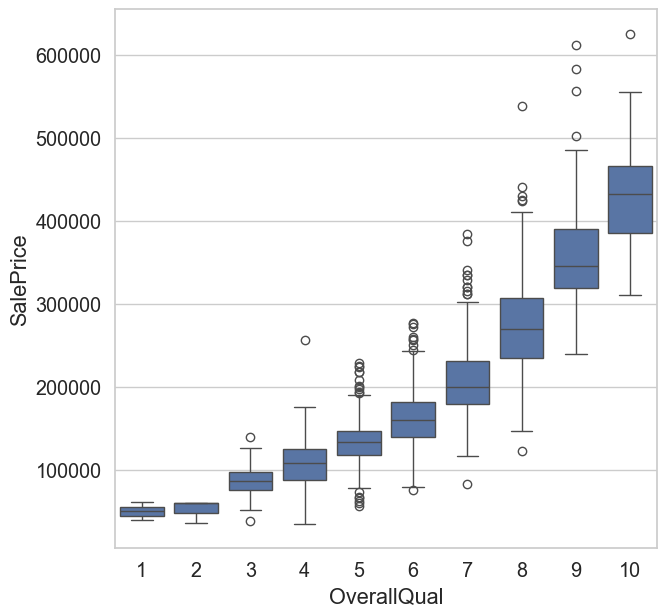

In [49]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

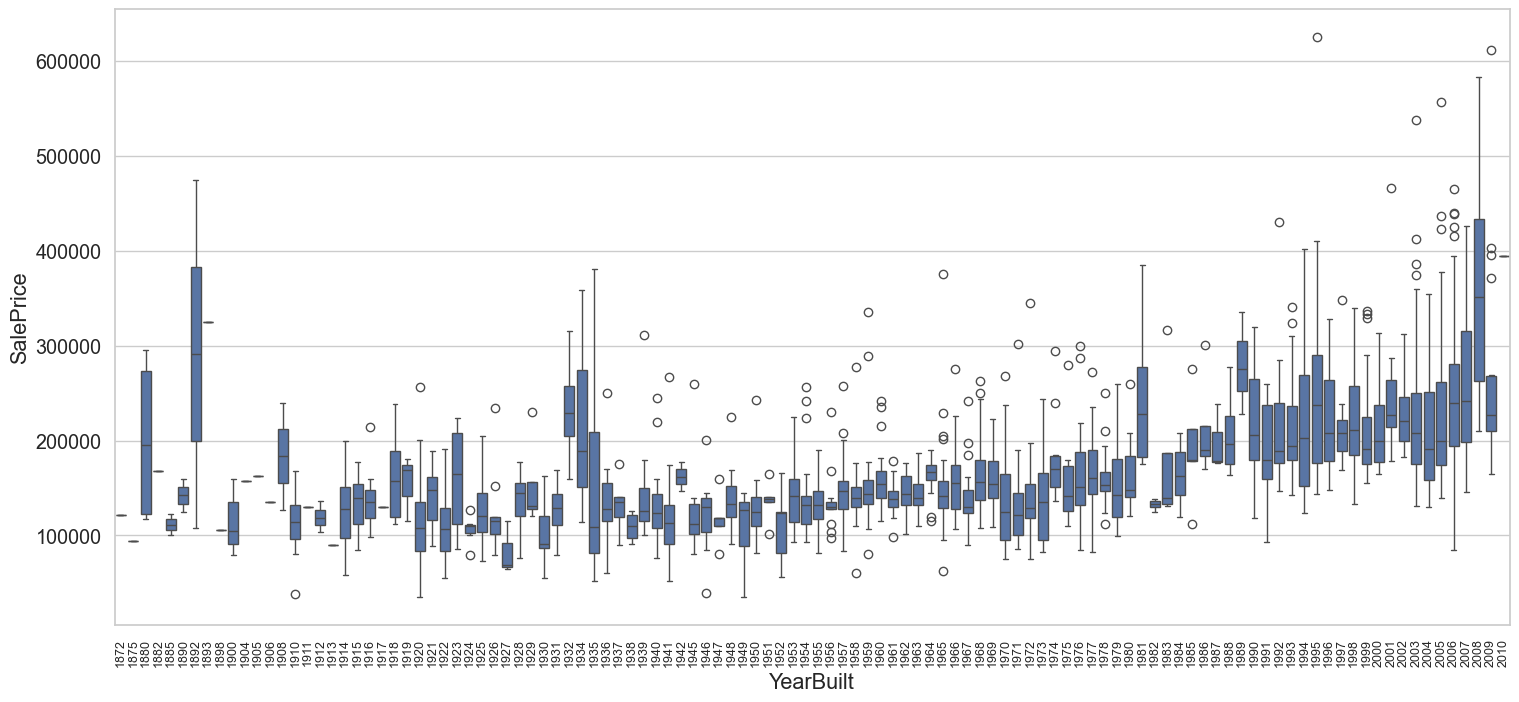

In [51]:
# plot a box plot for categorical feature : Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
sns.boxplot(x= df_train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

Skewness: 1.567473
Kurtosis: 3.888317


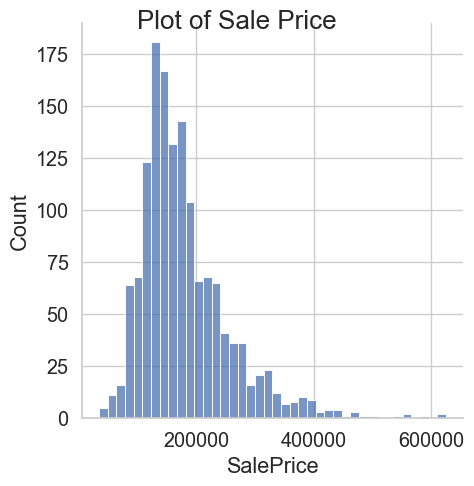

In [53]:
sns.displot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

<Figure size 500x500 with 0 Axes>

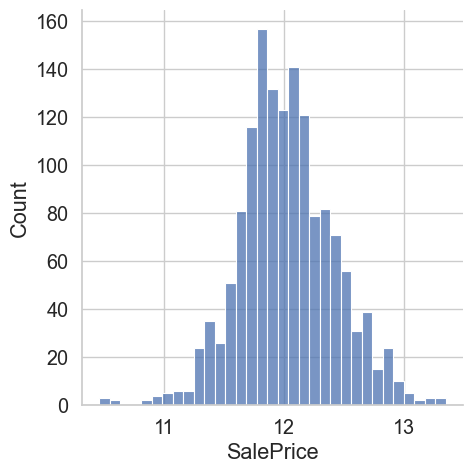

In [55]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.displot(df_train['SalePrice'])
plt.show()

In [57]:
df_train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [59]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [61]:
df_train.shape

(1455, 80)

In [63]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [65]:
#training data    
missing_data(df_train,20)

              Total No of missing val  % of Missing val  No of unique val
LotFrontage                       259         17.800687               109
GarageYrBlt                        81          5.567010                97
MasVnrArea                          8          0.549828               324
MSSubClass                          0          0.000000                15
KitchenAbvGr                        0          0.000000                 4
GarageType                          0          0.000000                 7
FireplaceQu                         0          0.000000                 6
Fireplaces                          0          0.000000                 4
Functional                          0          0.000000                 7
TotRmsAbvGrd                        0          0.000000                12
KitchenQual                         0          0.000000                 4
BedroomAbvGr                        0          0.000000                 8
GarageCars                          0 

In [69]:
df_train['PoolQC'].unique()


array([3, 1, 2])

In [71]:
#test data 
missing_data(df_test,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
MasVnrType                        894         61.274846                 3
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageYrBlt                        78          5.346127                97
GarageFinish                       78          5.346127                 3
GarageQual                         78          5.346127                 4
GarageCond                         78          5.346127                 5
GarageType                         76          5.209047                 6
BsmtCond                           45 

In [73]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [75]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

348
7878


In [77]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train 
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [79]:
# function to HANDLE the missing data in a dataframe
def missing (df):
    
    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o
    
    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [81]:
df_train = missing(df_train)
df_test = missing(df_test)

In [83]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [85]:
df_train.shape,df_test.shape

((1455, 75), (1459, 75))

In [87]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [89]:
# add the new columns
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [91]:
df_train.shape,df_test.shape

((1455, 80), (1459, 80))

In [93]:
#training data
g1 = df_train.columns.to_series().groupby(df_train.dtypes).groups

In [95]:
{k.name: v for k, v in g1.items()}

{'int32': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
       dtype='object'),
 'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCar

In [97]:
#testing data
g2 = df_test.columns.to_series().groupby(df_test.dtypes).groups

In [99]:
{k.name: v for k, v in g2.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'Total_Porch_SF', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'Total_SF', 'Total_Bathrooms',
        'Total_Square_Feet'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQ

In [101]:
#get dummy values for categorical data
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1455, 80)
(1459, 278)


In [103]:
#align the training and testing data
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [105]:
print(df_train.shape)
print(df_test.shape)

(1455, 41)
(1459, 41)


In [107]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [109]:
df_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,2,2008,2566,3.5,61,2416,12
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,5,2007,2524,2.5,298,2240,14
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,9,2008,2706,3.5,42,2272,12
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,2,2006,2473,2.0,307,1933,12
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,12,2008,3343,3.5,276,2853,13


In [111]:
df_test.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,120,0,0,6,2010,1778.0,1.0,260,1508.0,11
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,12500,6,2010,2658.0,1.5,429,2252.0,12
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,3,2010,2557.0,2.5,246,2420.0,10
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,6,2010,2530.0,2.5,396,2206.0,12
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,144,0,0,1,2010,2560.0,2.0,226,1543.0,13


In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1455 non-null   int64  
 1   LotFrontage        1455 non-null   float64
 2   LotArea            1455 non-null   int64  
 3   OverallQual        1455 non-null   int64  
 4   OverallCond        1455 non-null   int64  
 5   YearBuilt          1455 non-null   int64  
 6   YearRemodAdd       1455 non-null   int64  
 7   MasVnrArea         1455 non-null   float64
 8   BsmtFinSF1         1455 non-null   int64  
 9   BsmtFinSF2         1455 non-null   int64  
 10  BsmtUnfSF          1455 non-null   int64  
 11  TotalBsmtSF        1455 non-null   int64  
 12  1stFlrSF           1455 non-null   int64  
 13  2ndFlrSF           1455 non-null   int64  
 14  LowQualFinSF       1455 non-null   int64  
 15  GrLivArea          1455 non-null   int64  
 16  BsmtFullBath       1455 non-n

In [115]:
X_test = df_test           # testing features

In [117]:
df_train["SalePrice"] = train_label

In [119]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,2,2008,2566,3.5,61,2416,12,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,5,2007,2524,2.5,298,2240,14,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,9,2008,2706,3.5,42,2272,12,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,2,2006,2473,2.0,307,1933,12,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,12,2008,3343,3.5,276,2853,13,12.429216


In [121]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [123]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 41)
y_train shape: (1018,)

X_valid shape: (437, 41)
y_valid shape: (437,)

X_test shape: (1459, 41)


In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1020
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1018 non-null   int64  
 1   LotFrontage        1018 non-null   float64
 2   LotArea            1018 non-null   int64  
 3   OverallQual        1018 non-null   int64  
 4   OverallCond        1018 non-null   int64  
 5   YearBuilt          1018 non-null   int64  
 6   YearRemodAdd       1018 non-null   int64  
 7   MasVnrArea         1018 non-null   float64
 8   BsmtFinSF1         1018 non-null   int64  
 9   BsmtFinSF2         1018 non-null   int64  
 10  BsmtUnfSF          1018 non-null   int64  
 11  TotalBsmtSF        1018 non-null   int64  
 12  1stFlrSF           1018 non-null   int64  
 13  2ndFlrSF           1018 non-null   int64  
 14  LowQualFinSF       1018 non-null   int64  
 15  GrLivArea          1018 non-null   int64  
 16  BsmtFullBath       1018 non-n

In [127]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 1021 to 1459
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         437 non-null    int64  
 1   LotFrontage        437 non-null    float64
 2   LotArea            437 non-null    int64  
 3   OverallQual        437 non-null    int64  
 4   OverallCond        437 non-null    int64  
 5   YearBuilt          437 non-null    int64  
 6   YearRemodAdd       437 non-null    int64  
 7   MasVnrArea         437 non-null    float64
 8   BsmtFinSF1         437 non-null    int64  
 9   BsmtFinSF2         437 non-null    int64  
 10  BsmtUnfSF          437 non-null    int64  
 11  TotalBsmtSF        437 non-null    int64  
 12  1stFlrSF           437 non-null    int64  
 13  2ndFlrSF           437 non-null    int64  
 14  LowQualFinSF       437 non-null    int64  
 15  GrLivArea          437 non-null    int64  
 16  BsmtFullBath       437 non-

In [129]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1016    12.271345
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
Name: SalePrice, Length: 1018, dtype: float64

In [131]:
y_valid

1021    12.567237
1022    11.630709
1023    12.028739
1024    12.588191
1025    11.561716
          ...    
1455          NaN
1456          NaN
1457          NaN
1458          NaN
1459          NaN
Name: SalePrice, Length: 437, dtype: float64

In [133]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [135]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
5


In [137]:
np.where(np.isnan(y_valid))

(array([432, 433, 434, 435, 436], dtype=int64),)

In [139]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [141]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [143]:
y_valid.dtype

dtype('float64')

In [145]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(437, 41) (437,)



In [147]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [149]:
# function to calculate Root mean square error (RMSE)
def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [151]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):
    
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

In [153]:
reg = linear_model.LinearRegression()

In [155]:
cross_validation(reg)

Mean CV score:  0.41201997627787784


In [157]:
#fit on training
model_reg = reg.fit(X_train, y_train)

#predict value of sale price on the training set
y1_pred = reg.predict(X_train)

#caculate root mean square error
rmse(y1_pred,y_train)

rmse:  0.39150947390721785


In [159]:
#predict value of sale price on the validation set
y1_pred_v = reg.predict(X_valid)

#caculate root mean square error
rmse(y1_pred_v, y_valid)

rmse:  0.3946300176658585


<Figure size 1200x1200 with 0 Axes>

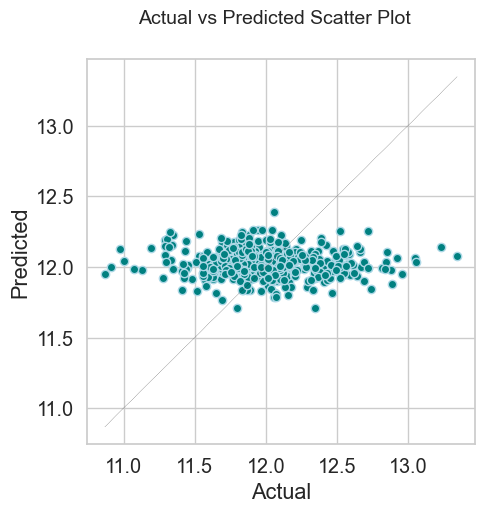

In [161]:
#plot
actual_vs_pred_plot(y_valid,y1_pred_v)

In [163]:
# to find the best value of alphas from this list, i will use RidgeCV
alphas_ = [ 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20]

# use robust scaler as unlike other scalers, the centering and scaling of ro bust scaler
#is based on percentiles and are therefore is not influenced by a few number of very large marginal outliers.

ridge = make_pipeline(MinMaxScaler(), linear_model.RidgeCV(alphas = alphas_, cv = 10))

In [165]:
cross_validation(ridge)

Mean CV score:  0.40354080732575515


In [167]:
#fit
model_ridge = ridge.fit(X_train, y_train)

#predict value of sale price on the training set
y2_pred = ridge.predict(X_train)

#caculate root mean square error
rmse(y2_pred,y_train)

rmse:  0.3936184954912292


In [169]:
#predict value of sale price on the valid set
y2_pred_v = ridge.predict(X_valid)

#caculate root mean square error
rmse(y2_pred_v, y_valid)

rmse:  0.38729382120690137


<Figure size 1200x1200 with 0 Axes>

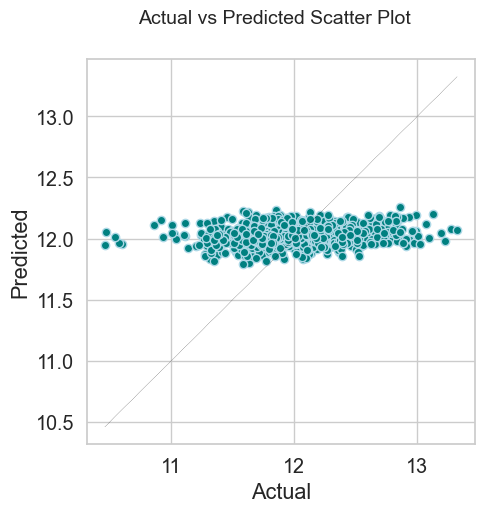

In [171]:
#plot
actual_vs_pred_plot(y_train,y2_pred)

In [173]:
# to find the best value of alphas from this list, i will use LassoCV
alpha2 = [0.0001, 0.0002, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

#use robust scaler so that predictions are not influenced by a few number of very large marginal outliers

lasso = make_pipeline(RobustScaler(), linear_model.LassoCV(alphas = alpha2, random_state=42,cv=12,max_iter=2000))

In [175]:
cross_validation(lasso)

Mean CV score:  0.4110957021155441


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.654597574164569, tolerance: 0.013883915191350326
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6459058936809896, tolerance: 0.013883915191350326
  model = cd_fast.enet_coordinate_descent_gram(


In [177]:
#fit
model_lasso = lasso.fit(X_train, y_train)

#predict value of quality on the training set
y3_pred = lasso.predict(X_train)

#caculate root mean square error
rmse(y3_pred,y_train)

rmse:  0.3916439949246274


In [179]:
#predict value of sale price on the validation set
y3_pred_v = lasso.predict(X_valid)

#caculate root mean square error
rmse(y3_pred_v, y_valid)

rmse:  0.3929622808350817


<Figure size 1200x1200 with 0 Axes>

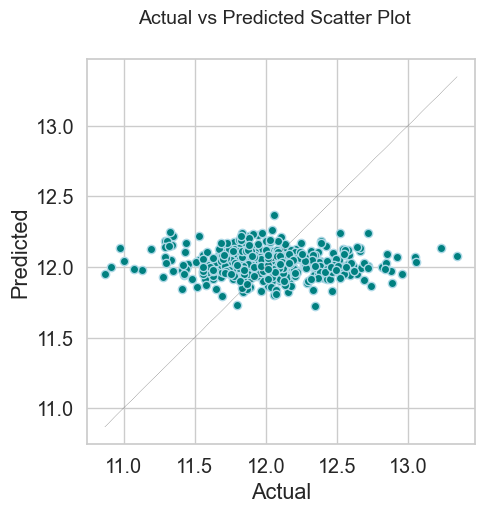

In [181]:
actual_vs_pred_plot(y_valid,y3_pred_v)

In [183]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,y_train)

#predict value of sale price on the training set
y4_pred = neigh.predict(X_train)

#caculate root mean square error
rmse(y4_pred,y_train)

rmse:  0.34885424380933583


In [185]:
# N = 7 #
neigh1 = KNeighborsRegressor(n_neighbors = 7,
                             weights = 'uniform',
                             leaf_size=25)
neigh1.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh1.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.3665712393534244


In [187]:
# N = 9 #
neigh2 = KNeighborsRegressor(n_neighbors = 9,
                             weights = 'uniform',
                             leaf_size=25)
neigh2.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh2.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.37262338937265044


In [189]:
#predict value of sale price on the validation set
y4_pred_v = neigh.predict(X_valid)

#caculate root mean square error
rmse(y4_pred_v, y_valid)

rmse:  0.41351487769327555


<Figure size 1200x1200 with 0 Axes>

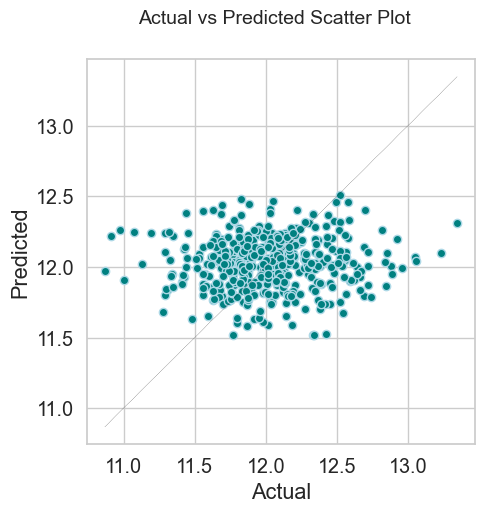

In [191]:
actual_vs_pred_plot(y_valid,y4_pred_v)

In [193]:
from sklearn import tree

In [195]:
# set max depth to 5
tree_regr1 = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf=5,random_state=42)

# set max depth to 9
tree_regr2 = tree.DecisionTreeRegressor(max_depth = 9,min_samples_leaf=9,random_state=42)

#fit the traning data to a decision tree model
tree_regr11 = tree_regr1.fit(X_train,y_train)
tree_regr12 = tree_regr2.fit(X_train,y_train)

#predict value of sale price on the training set
y1 = tree_regr1.predict(X_train)
y2 = tree_regr2.predict(X_train)

In [197]:
cross_validation(tree_regr1)
cross_validation(tree_regr2)

Mean CV score:  0.45686474179354564
Mean CV score:  0.46852231786170545


In [201]:
#calculate root mean square error
rmse(y1,y_train)

rmse:  0.34029042173096025


In [203]:
rmse(y2,y_train)

rmse:  0.3308919968917856


In [205]:
#predict value of sale price on the validation set
y5_pred_v = tree_regr2.predict(X_valid)

#caculate root mean square error
rmse(y5_pred_v, y_valid)

rmse:  0.44102239796245823


<Figure size 1200x1200 with 0 Axes>

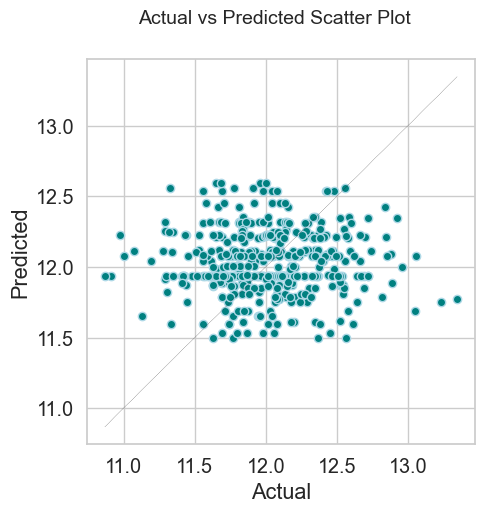

In [207]:
#plot
actual_vs_pred_plot(y_valid,y5_pred_v)

In [209]:
rforest = RandomForestRegressor(n_estimators=200,max_depth=13,random_state=42)

In [211]:
# grid search to find best value of C, gamma and epsilon
param_grid  = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [5,7,9,11,13,15,17], 
               'min_samples_leaf': [3,5,7,9,11,13,15]}

# set cross validation to 5
clf = GridSearchCV(rforest, param_grid, cv = 5, n_jobs = -2)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=13, n_estimators=200,
                                             random_state=42),
             n_jobs=-2,
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15, 17],
                         'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [213]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 200}

In [217]:
rforest = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=3, random_state=42)

In [219]:
cross_validation(rforest)

Mean CV score:  0.4051183551680189


In [221]:
#fit
model_rforest = rforest.fit(X_train, y_train)

#predict value of sale price on the training set
y6_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y6_pred,y_train)

rmse:  0.3506648210391429


In [223]:
#predict value of sale price on the validation set
y6_pred_v = rforest.predict(X_valid)

#caculate root mean square error
rmse(y6_pred_v, y_valid)

rmse:  0.38718759198736374


<Figure size 1200x1200 with 0 Axes>

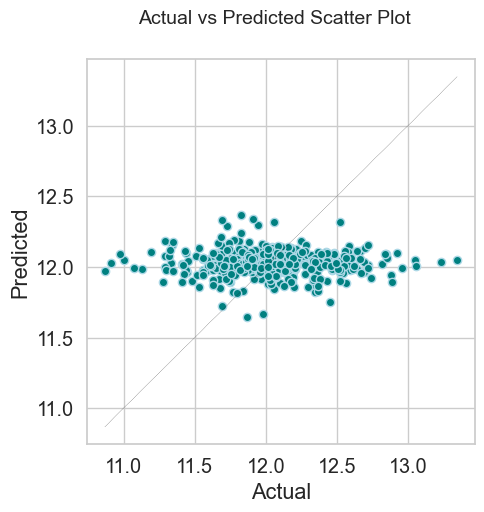

In [225]:
#plot
actual_vs_pred_plot(y_valid, y6_pred_v)

In [227]:
svr_basic = SVR(C = 10, gamma = 0.001)

In [229]:
# grid search to find best value of C, gamma and epsilon and default kernel 'rbf'
param_grid  = {'C': [5,7,10,15,20,30],'gamma': [0.001, 0.0001, 0.0011, 0.00011], 'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008, 0.009] }

# set cross validation to 5
clf = GridSearchCV(svr_basic, param_grid, cv = 10, n_jobs = -2)
clf.fit(X_train,y_train)

C:\Users\KIIT\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=SVR(C=10, gamma=0.001), n_jobs=-2,
             param_grid={'C': [5, 7, 10, 15, 20, 30],
                         'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008,
                                     0.009],
                         'gamma': [0.001, 0.0001, 0.0011, 0.00011]})

In [231]:
clf.best_params_

{'C': 5, 'epsilon': 0.1, 'gamma': 0.0011}

In [233]:
#make final SVR model with best parameters found from grid search
svr = make_pipeline(MinMaxScaler(), SVR(C= 5, epsilon= 0.1, gamma=0.0011, kernel = "sigmoid"))

In [235]:
cross_validation(svr)

Mean CV score:  0.40258554701372945


In [237]:
#fit
model_svr = svr.fit(X_train, y_train)

#predict value of sale price on the training set
y7_pred = svr.predict(X_train)

#caculate root mean square error
rmse(y7_pred,y_train)

rmse:  0.39614217263401985


In [239]:
#predict value of sale price on the validation set
y7_pred_v = svr.predict(X_valid)

#caculate root mean square error
rmse(y7_pred_v, y_valid)

rmse:  0.3841326680582975


<Figure size 1200x1200 with 0 Axes>

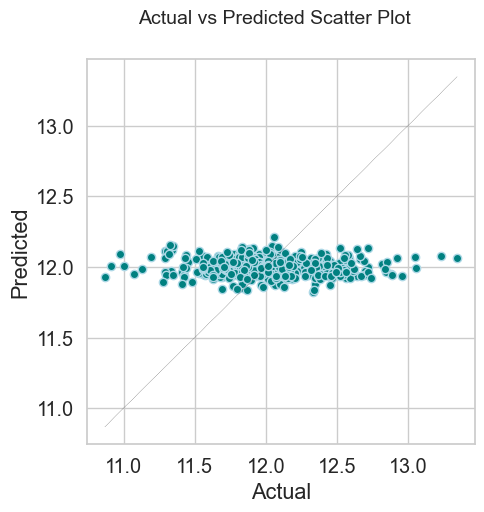

In [241]:
actual_vs_pred_plot(y_valid, y7_pred_v)

In [243]:
# set max depth to 4, min_samples_leaf to 15
gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,
                                min_samples_leaf=7, loss='huber', random_state =42) 

In [245]:
# set max depth to 7, min_samples_leaf to 10
gbr2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 9,
                                min_samples_leaf=10, loss='huber', random_state =42) 

In [247]:
cross_validation(gbr1)
cross_validation(gbr2)

Mean CV score:  0.4255322511908149
Mean CV score:  0.4308105891745751


In [249]:
#fit
model_gbr1 = gbr1.fit(X_train, y_train)
model_gbr2 = gbr2.fit(X_train, y_train)

#predict value of sale price on the training set
y_g1_pred = gbr1.predict(X_train)
y_g2_pred = gbr2.predict(X_train)

#caculate root mean square error
rmse(y_g1_pred,y_train)
rmse(y_g2_pred,y_train)

rmse:  0.1558273696403813
rmse:  0.14968522118473615


In [251]:
#predict value of sale price on the validation set
y8_pred_v = gbr2.predict(X_valid)

#caculate root mean square error
rmse(y8_pred_v, y_valid)

rmse:  0.41685355199772284


<Figure size 1200x1200 with 0 Axes>

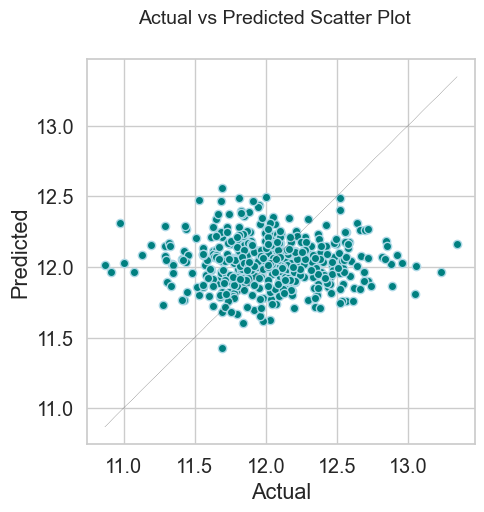

In [253]:
# plot for gbr2
actual_vs_pred_plot(y_valid, y8_pred_v)

In [255]:
# using Random Forest,Support Vector Regressor and Gradient Boosting to build a stack model because they have lower RMSE comparatively
estimators = [('Random Forest', rforest),
              ("Support Vector Regressor",svr),
              ("K",neigh),
              ("Ridge",ridge)
              ]

In [257]:
stacked = StackingRegressor(estimators = estimators, final_estimator = rforest, cv=5)

In [259]:
cross_validation(stacked)

Mean CV score:  0.4104167680913444


In [261]:
#fit
model_stack = stacked.fit(X_train, y_train)

#predict value of sale price on the training set
y9_pred = stacked.predict(X_train)

#caculate root mean square error
rmse(y9_pred,y_train)

rmse:  0.3964649422916056


In [263]:
#predict value of sale price on the validation set
y9_pred_v = stacked.predict(X_valid)

#caculate root mean square error
rmse(y9_pred_v, y_valid)

rmse:  0.377250588344419


<Figure size 1200x1200 with 0 Axes>

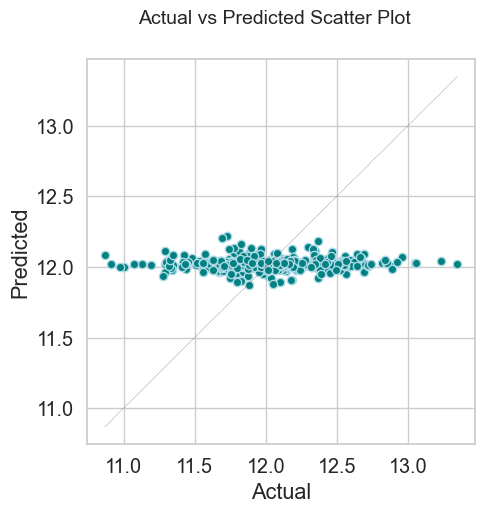

In [265]:
# plot
actual_vs_pred_plot(y_valid,y9_pred_v)

In [273]:
X_test.shape

(1459, 41)

In [275]:
#predict value of sale price on the training set
y_final_pred = stacked.predict(X_test)

y_final_pred

array([12.02898464, 12.04392325, 12.03056011, ..., 12.00551834,
       11.9633005 , 12.03224633])

In [277]:
#undo the log tranformation to get predictions in terms of original label
predictions = np.expm1(y_final_pred)
print(predictions)

[167540.21122768 170061.83274068 167804.376553   ... 163654.41000583
 156889.04755654 168087.57148441]


In [279]:
submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = predictions
submit.to_csv('submission.csv',index=False)

In [281]:
submit

,Id,SalePrice
0,1461,167540.211228
1,1462,170061.832741
2,1463,167804.376553
3,1464,154710.199058
4,1465,167676.994472
...,...,...
1454,2915,167344.737026
1455,2916,177738.074349
1456,2917,163654.410006
1457,2918,156889.047557
